<a href="https://colab.research.google.com/github/linarahmatin/2341720029_ML_2025/blob/main/JS11/TG1_JS11_SesyTana_Lina_Rahmatin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 1

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

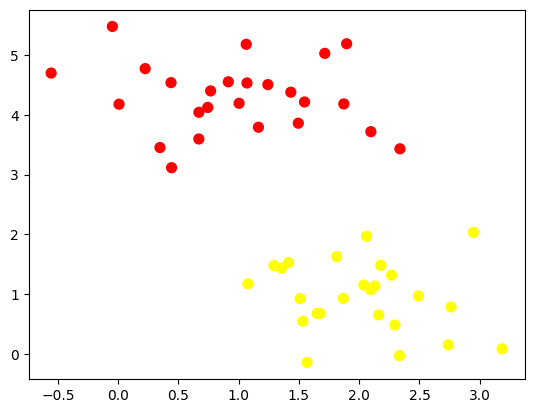

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

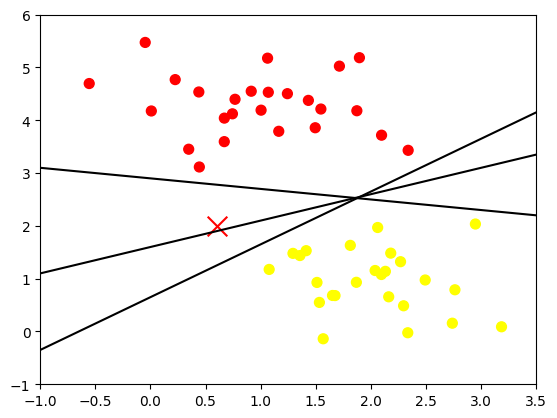

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

# Membuat data dua klaster
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# Scatter plot dua klaster
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Titik uji (misalnya titik yang ingin diklasifikasikan)
plt.scatter(0.6, 2, c='red', s=200, marker='x')

# Membuat beberapa garis pemisah (contoh ilustrasi)
xfit = np.linspace(-1, 3.5)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.ylim(-1, 6)
plt.show()


(-1.0, 3.5)

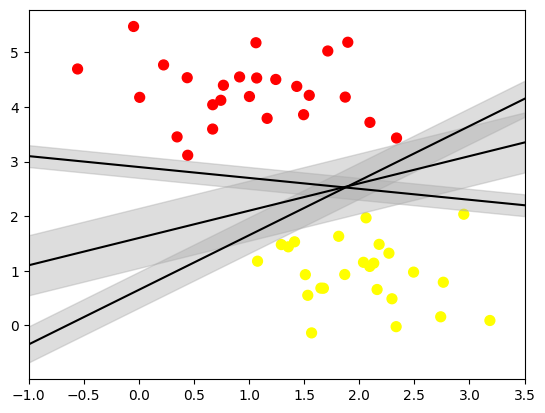

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

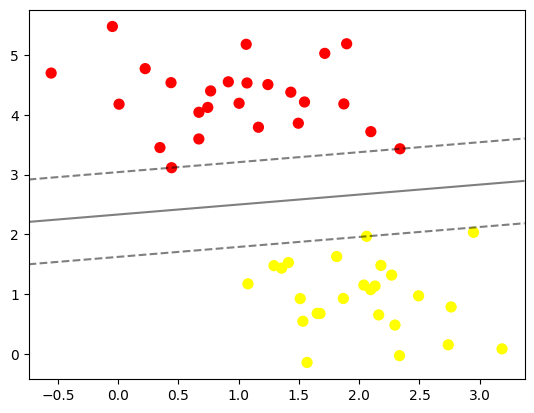

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

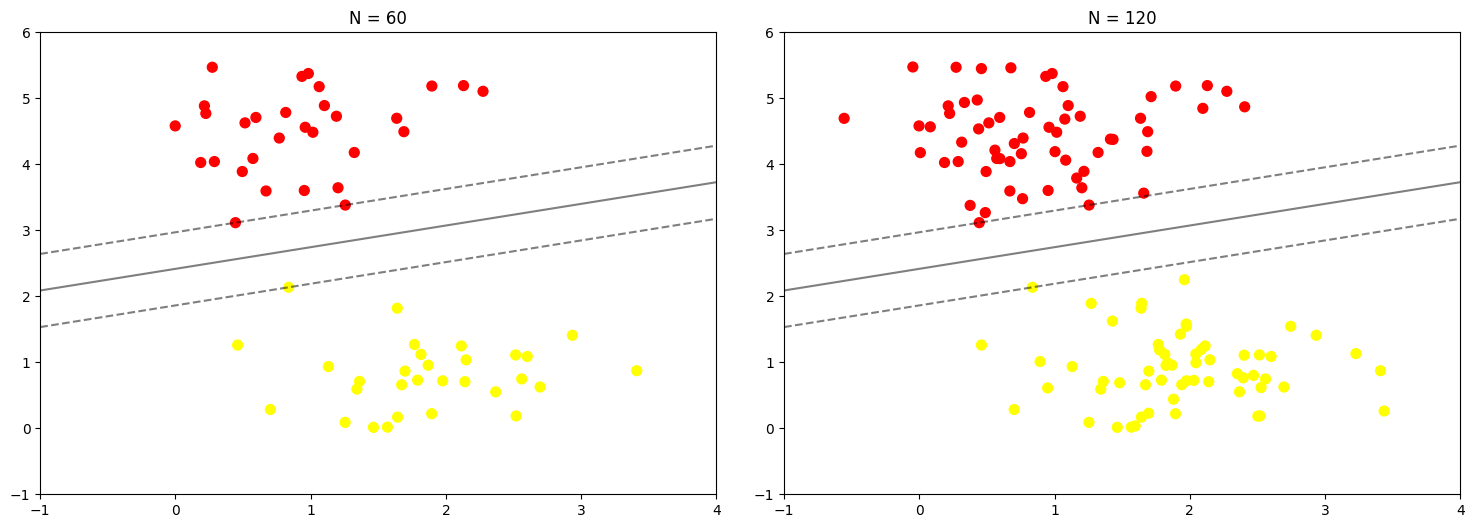

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


##Lab 2

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

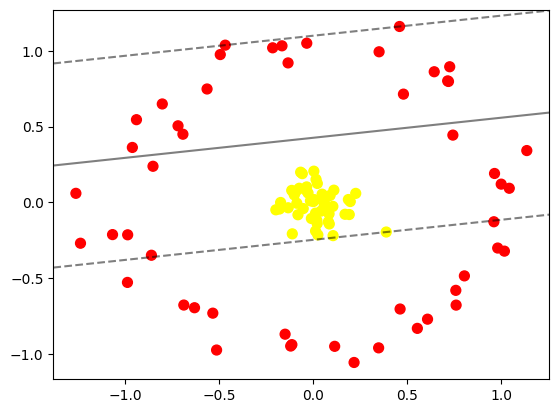

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# Data awal
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# Hitung nilai r (fungsi Gaussian dari jarak titik)
r = np.exp(-(X ** 2).sum(1))

# Fungsi untuk plotting 3D
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# Gunakan widget interaktif untuk mengubah sudut pandang
interact(plot_3D, elev=[-90, 45, 30, 20, 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y))


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.41281595,  1.5303347 ],
       [ 1.81336135,  1.6311307 ],
       [ 1.43289271,  4.37679234],
       [ 1.87271752,  4.18069237],
       [ 2.09517785,  1.0791468 ],
       [ 2.73890793,  0.15676817],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 2.03835818,  1.15466278],
       [-0.04749204,  5.47425256],
       [ 1.71444449,  5.02521524],
       [ 0.22459286,  4.77028154],
       [ 1.06923853,  4.53068484],
       [ 1.53278923,  0.55035386],
       [ 1.4949318 ,  3.85848832],
       [ 1.1641107 ,  3.79132988],
       [ 0.74387399,  4.12240568],
       [ 2.29667251,  0.48677761],
       [ 0.44359863,  3.11530945],
       [ 0.91433877,  4.55014643],
       [ 1.67467427,  0.68001896],
       [ 2.26908736,  1.32160756],
       [ 1.5108885 ,  0.9288309 ],
       [ 1.65179125,  0.68193176],
       [ 2.49272186,  0.97505341],
       [ 2.33812285,  3.43116792],
       [ 0.67047877,  4.04094275],
       [-0.55552381,  4.69595848],
       [ 2.16172321,  0.6565951 ],
       [ 2.09680487,  3.7174206 ],
       [ 2.18023251,  1.48364708],
       [ 0.43899014,  4.53592883],
       [ 1.24258802,  4.50399192],
       [ 0.00793137,  4.17614316],
       [ 1.89593761,  5.18540259],
       [ 1.868336  ,  0.93136287],
       [ 2.13141478,  1.13885728],
       [ 1.06269622,  5.17635143],
       [ 2.33466499, -0.02408255],
       [ 0.669787  ,  3.59540802],
       [ 1.07714851,  1.17533301],
       [ 1.54632313,  4.212973  ],
       [ 1.56737975, -0.1381059 ],
       [ 1.35617762,  1.43815955],
       [ 1.00372519,  4.19147702],
       [ 1.29297652,  1.47930168],
       [ 2.94821884,  2.03519717],
       [ 0.3471383 ,  3.45177657],
       [ 2.76253526,  0.78970876],
       [ 0.76752279,  4.39759671]]), y=array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0]))>

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

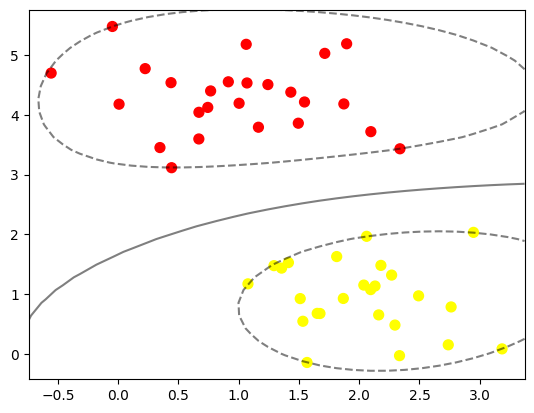

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

##Lab 3

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

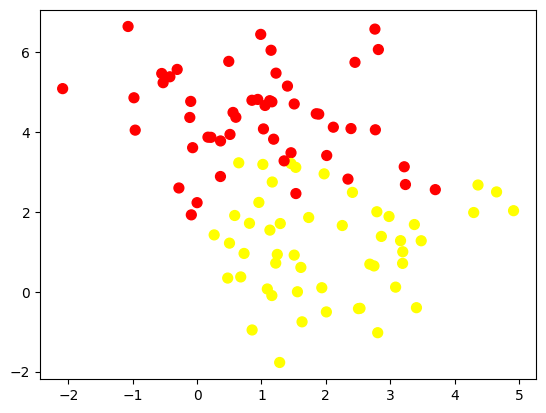

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

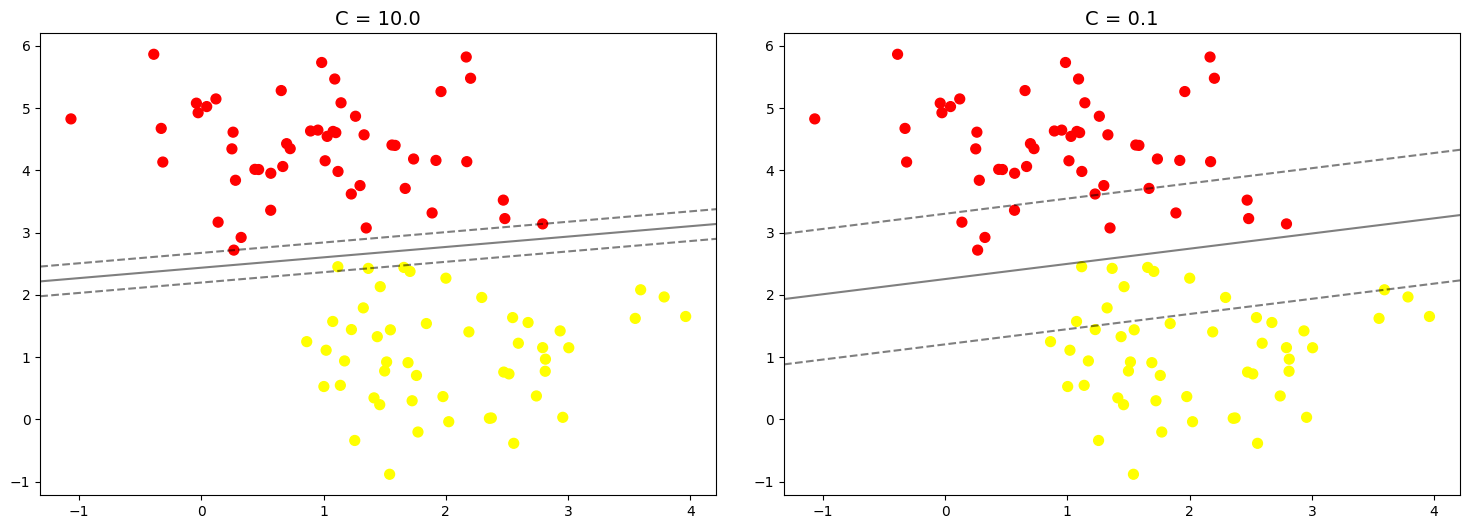

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

##Lab 4

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


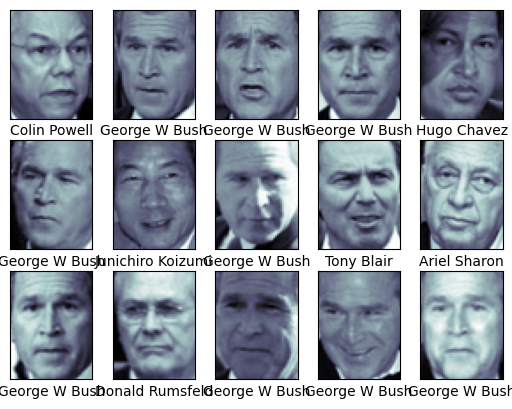

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 18s, sys: 311 ms, total: 2min 18s
Wall time: 1min 27s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

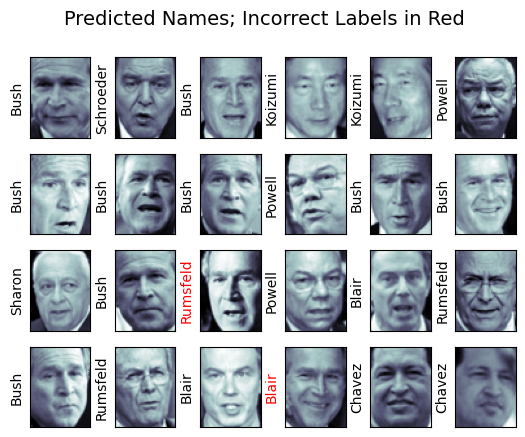

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

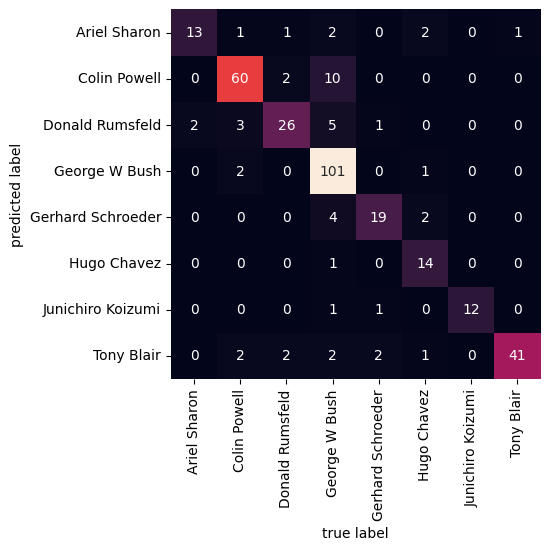

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

##Lab 5

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/images/training"
test_dir = "/content/drive/MyDrive/Colab Notebooks/images/test"

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[73, 47, 46],
         [41, 15, 14],
         [30,  6,  4],
         ...,
         [59, 38, 37],
         [48, 27, 26],
         [60, 39, 38]],
 
        [[38, 12, 11],
         [30,  4,  3],
         [44, 20, 18],
         ...,
         [21,  0,  0],
         [28,  7,  6],
         [28,  7,  4]],
 
        [[41, 15, 16],
         [37, 11, 12],
         [24,  0,  0],
         ...,
         [35, 16, 10],
         [25,  6,  2],
         [27,  8,  2]],
 
        ...,
 
        [[78, 34, 21],
         [79, 35, 24],
         [95, 51, 40],
         ...,
         [65, 32, 25],
         [58, 28, 20],
         [53, 24, 16]],
 
        [[68, 22,  7],
         [85, 39, 26],
         [91, 45, 32],
         ...,
         [74, 40, 31],
         [71, 38, 31],
         [61, 31, 21]],
 
        [[73, 26, 10],
         [89, 42, 26],
         [54,  6,  0],
         ...,
         [75, 38, 29],
         [62, 28, 19],
         [55, 23, 12]]], dtype=uint8),
 'night')

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 150
(372, 640, 3)


In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (471, 640, 3)
Label	: day


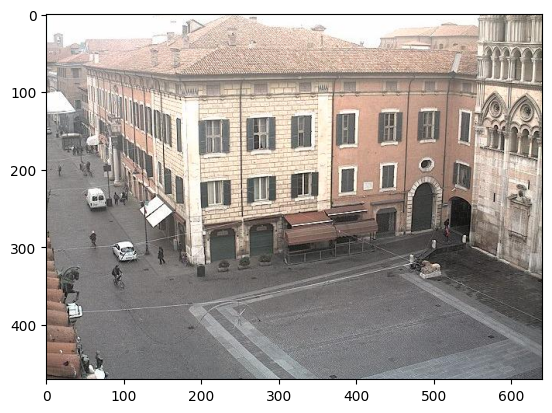

In [ ]:
random_img_viz(train_img)

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 135
(600, 1100, 3)


In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 130
Avg Brighness: 131.9050


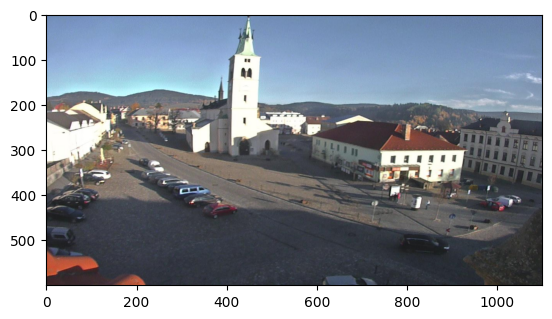

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 99
Actual label: 0
Predicted label: 0


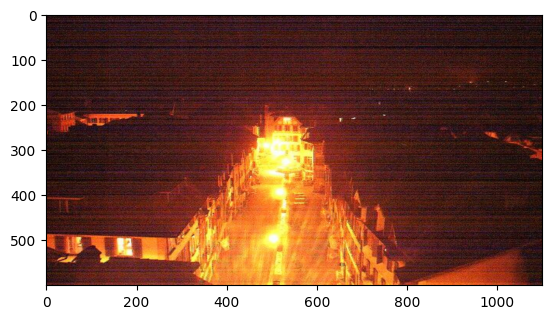

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,96.859232,0.0
1,98.769214,0.0
2,99.623588,0.0
3,102.748306,0.0
4,99.175548,0.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,111.826289,0.0
1,40.419198,0.0
2,175.582911,0.0
3,41.211485,0.0
4,38.805955,0.0


In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


##Tugas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/voice.csv")

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Buat model dengan kernel linear
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)

print("=== HASIL MODEL SVM (KERNEL LINEAR) ===")
print(f"Akurasi : {acc_linear*100:.2f}%")


=== HASIL MODEL SVM (KERNEL LINEAR) ===
Akurasi : 97.48%


In [ ]:
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_poly = svm_poly.predict(X_test)
acc_poly = accuracy_score(y_test, y_pred_poly)

print("\n=== HASIL MODEL SVM (KERNEL POLYNOMIAL) ===")
print(f"Akurasi : {acc_poly*100:.2f}%")


=== HASIL MODEL SVM (KERNEL POLYNOMIAL) ===
Akurasi : 95.74%


In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("\n=== HASIL MODEL SVM (KERNEL RBF) ===")
print(f"Akurasi : {acc_rbf*100:.2f}%")


=== HASIL MODEL SVM (KERNEL RBF) ===
Akurasi : 98.26%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# === LOAD DAN PERSIAPAN DATA ===
df = pd.read_csv("/content/voice.csv")

# Encode label (male/female → 0/1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Pisahkan fitur dan label
X = df.drop('label', axis=1)
y = df['label']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def evaluate_svm(split_ratio):
    results = []
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=1-split_ratio, random_state=42, stratify=y
    )

    # Kernel Linear
    model_linear = SVC(kernel='linear', random_state=42)
    model_linear.fit(X_train, y_train)
    acc_linear = accuracy_score(y_test, model_linear.predict(X_test))
    results.append({'Split': f'{int(split_ratio*100)}:{int((1-split_ratio)*100)}',
                    'Kernel': 'linear', 'Accuracy': acc_linear})

    # Kernel Polynomial
    model_poly = SVC(kernel='poly', random_state=42)
    model_poly.fit(X_train, y_train)
    acc_poly = accuracy_score(y_test, model_poly.predict(X_test))
    results.append({'Split': f'{int(split_ratio*100)}:{int((1-split_ratio)*100)}',
                    'Kernel': 'polynomial', 'Accuracy': acc_poly})

    # Kernel RBF
    model_rbf = SVC(kernel='rbf', random_state=42)
    model_rbf.fit(X_train, y_train)
    acc_rbf = accuracy_score(y_test, model_rbf.predict(X_test))
    results.append({'Split': f'{int(split_ratio*100)}:{int((1-split_ratio)*100)}',
                    'Kernel': 'rbf', 'Accuracy': acc_rbf})

    return results

results_70 = evaluate_svm(0.7)
results_80 = evaluate_svm(0.8)

df_results = pd.DataFrame(results_70 + results_80)

print("\n=== PERFORMA MODEL SVM BERDASARKAN SPLIT DAN KERNEL ===")
print(df_results.to_string(index=False))

best = df_results.loc[df_results['Accuracy'].idxmax()]
print(f"\n Kernel terbaik: {best['Kernel']} (Split {best['Split']}) "
      f"dengan akurasi {best['Accuracy']*100:.2f}%")



=== PERFORMA MODEL SVM BERDASARKAN SPLIT DAN KERNEL ===
Split     Kernel  Accuracy
70:30     linear  0.978970
70:30 polynomial  0.958991
70:30        rbf  0.983176
80:19     linear  0.974763
80:19 polynomial  0.957413
80:19        rbf  0.982650

 Kernel terbaik: rbf (Split 70:30) dengan akurasi 98.32%


##Dataset Day -Night


In [ ]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/training'
test_dir = '/content/drive/MyDrive/Colab Notebooks/test'

In [ ]:
#  Load Data dan Visualisasikan
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = dir.name
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Standarisasi ukuran gambar
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))
    return std_img

In [ ]:
# preprocessing
def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        std_img = standarized_input(image)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    return std_img_list

In [ ]:
# Ekstraksi Fitur
def extract_color_histogram(image, bins=8):
    hist_r = cv2.calcHist([image], [0], None, [bins], [0,256]).flatten()
    hist_g = cv2.calcHist([image], [1], None, [bins], [0,256]).flatten()
    hist_b = cv2.calcHist([image], [2], None, [bins], [0,256]).flatten()
    hist = np.concatenate([hist_r, hist_g, hist_b])
    hist = hist / np.sum(hist)
    return hist

In [ ]:
train_std_img_list = load_dataset(train_dir)
train_std_img_list = preprocess(train_std_img_list)

In [ ]:
features = []
labels = []
for img, lbl in train_std_img_list:
    hist_feat = extract_color_histogram(img)
    features.append(hist_feat)
    labels.append(lbl)

X = np.array(features)
y = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC()

In [ ]:
# Evaluasi Awal
y_pred = svm_rbf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi awal (C=1, gamma='scale'): {acc:.4f}")

Akurasi awal (C=1, gamma='scale'): 1.0000


In [ ]:
C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 0.1, 0.01, 0.001]

In [ ]:
from sklearn.metrics import classification_report

best_acc = 0
best_params = None
for C in C_values:
    for g in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=g)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"C={C}, gamma={g}, Akurasi={acc:.4f}")
        if acc > best_acc:
            best_acc = acc
            best_params = (C, g)

C=0.1, gamma=scale, Akurasi=0.8750
C=0.1, gamma=0.1, Akurasi=0.6458
C=0.1, gamma=0.01, Akurasi=0.6458
C=0.1, gamma=0.001, Akurasi=0.6458
C=1, gamma=scale, Akurasi=1.0000
C=1, gamma=0.1, Akurasi=0.6667
C=1, gamma=0.01, Akurasi=0.6458
C=1, gamma=0.001, Akurasi=0.6458
C=10, gamma=scale, Akurasi=1.0000
C=10, gamma=0.1, Akurasi=0.8958
C=10, gamma=0.01, Akurasi=0.6667
C=10, gamma=0.001, Akurasi=0.6458
C=100, gamma=scale, Akurasi=1.0000
C=100, gamma=0.1, Akurasi=1.0000
C=100, gamma=0.01, Akurasi=0.8958
C=100, gamma=0.001, Akurasi=0.6667


In [ ]:
best_model = SVC(kernel='rbf', C=best_params[0], gamma=best_params[1])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['night', 'day']))


Classification Report:
              precision    recall  f1-score   support

       night       1.00      1.00      1.00        24
         day       1.00      1.00      1.00        24

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

